# Understanding the Effect of Zika Virus in Acetylcholinesterase Enzyme

## Extracting the Data From Chembl Library

Zika Virus can cause extreme weakness and paralysis for few months so: we are going to analyze Acetylcholinesterase as target.

Acetylcholinesterase (AChE) is related to weakness and short-term paralysis due to its role in terminating the action of acetylcholine at neuromuscular junctions. Conditions like myasthenia gravis and exposure to certain toxins or insecticides that inhibit AChE can lead to muscle weakness, fatigue, and paralysis.

### Importing Required Libraries

In [1]:
import pandas as pd
from chembl_webresource_client.new_client import new_client
import matplotlib.pyplot as plt
import numpy as np

### Search for target Protein

In [2]:
target = new_client.target
target_query = target.search("acetylcholinesterase")
target = pd.DataFrame.from_dict(target_query)
target.head()

,cross_references,organism,pref_name,score,species_group_flag,target_chembl_id,target_components,target_type,tax_id
0,"[{'xref_id': 'P22303', 'xref_name': None, 'xre...",Homo sapiens,Acetylcholinesterase,28.0,False,CHEMBL220,"[{'accession': 'P22303', 'component_descriptio...",SINGLE PROTEIN,9606
1,[],Homo sapiens,Cholinesterases; ACHE & BCHE,28.0,False,CHEMBL2095233,"[{'accession': 'P06276', 'component_descriptio...",SELECTIVITY GROUP,9606
2,[],Drosophila melanogaster,Acetylcholinesterase,18.0,False,CHEMBL2242744,"[{'accession': 'P07140', 'component_descriptio...",SINGLE PROTEIN,7227
3,[],Bemisia tabaci,AChE2,16.0,False,CHEMBL2366409,"[{'accession': 'B3SST5', 'component_descriptio...",SINGLE PROTEIN,7038
4,[],Leptinotarsa decemlineata,Acetylcholinesterase,16.0,False,CHEMBL2366490,"[{'accession': 'Q27677', 'component_descriptio...",SINGLE PROTEIN,7539


In [3]:
## Selecting the target related to Homo Sapiens only
selected_target = target[(target["organism"]== "Homo sapiens") & (target["pref_name"]=="Acetylcholinesterase")]
selected_target

,cross_references,organism,pref_name,score,species_group_flag,target_chembl_id,target_components,target_type,tax_id
0,"[{'xref_id': 'P22303', 'xref_name': None, 'xre...",Homo sapiens,Acetylcholinesterase,28.0,False,CHEMBL220,"[{'accession': 'P22303', 'component_descriptio...",SINGLE PROTEIN,9606


In [4]:
## Retrieving Bioactivity Data
activity = new_client.activity
res = activity.filter(target_cheml_id = selected_target["target_chembl_id"].values[0]).filter(standard_type = "EC50")


In [5]:
df2 = pd.read_csv("./acetylcholinesterase_01_bioactivity_data_raw.csv")
df2.head()

,action_type,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,NaN,NaN,31880,[],CHEMBL651396,Effective concentration of compound achieving ...,F,NaN,NaN,BAO_0000188,...,Homo sapiens,CCRF-CEM,9606.0,NaN,NaN,EC50,uM,UO_0000065,NaN,0.063600
1,NaN,NaN,31902,[],CHEMBL761156,In vitro antimalarial activity against Plasmod...,F,NaN,NaN,BAO_0000188,...,Plasmodium falciparum,Plasmodium falciparum,5833.0,NaN,NaN,EC50,M,UO_0000065,NaN,0.000013
2,NaN,NaN,32181,[],CHEMBL652136,Effect on PI turnover in intact CHO-K1 cells,F,NaN,NaN,BAO_0000188,...,Cricetulus griseus,CHO-K1,10029.0,NaN,NaN,EC50,uM,UO_0000065,NaN,1.300000
3,NaN,Not Determined,32230,[],CHEMBL656169,In vitro agonistic activity against RXR alpha ...,F,NaN,NaN,BAO_0000188,...,Homo sapiens,Retinoid X receptor alpha,9606.0,NaN,NaN,EC50,nM,UO_0000065,NaN,NaN
4,NaN,NaN,32233,[],CHEMBL658541,In vitro agonist efficacy against PPAR gamma a...,F,NaN,NaN,BAO_0000188,...,Homo sapiens,Peroxisome proliferator-activated receptor gamma,9606.0,NaN,NaN,EC50,nM,UO_0000065,NaN,63.000000


# Data Wrangling and Feature Engineering

## Handling Missing Values

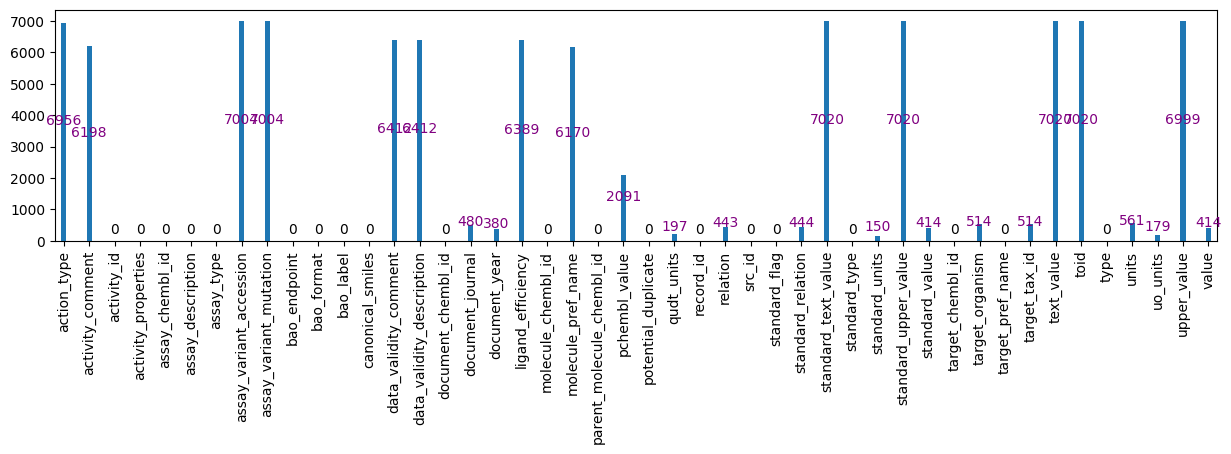

In [6]:
## Visualize count of missing values
plt.figure(figsize = (15,3))
ax = df2.isnull().sum().plot(kind = "bar", width = 0.2)
for p in ax.patches:
    count = int(p.get_height())
    if count!=0:
        ax.annotate(str(count), 
                    xy = (p.get_x() + p.get_width() / 2., count//2), 
                    textcoords = "offset points", 
                    xytext = (0,3), ha = "center",
                   va = "bottom", color = "purple")
    else:
        
        ax.annotate(str(count), 
                    xy = (p.get_x() + p.get_width() / 2., count//2), 
                    textcoords = "offset points", 
                    xytext = (0,3), ha = "center",
                   va = "bottom", color = "black")

The columns of our main interest are standard_value and canonical_smiles.Stadnard_Value has 414 null values and canonical smiles doesn't have any.
We will consider only the rows where standard_value and canonical_smiles doesn't have any null values.

In [7]:
new_df2 = df2[(df2["standard_value"].notna()) & (df2["canonical_smiles"].notna())]
new_df2.isnull().sum()["standard_value"]

0

In [8]:
new_df2.shape

(6606, 46)

In [9]:
## We want to analyze activity with unique canonical smiles
new_df2_unique = new_df2.drop_duplicates(subset = ["canonical_smiles"])
new_df2_unique.head()

,action_type,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,NaN,NaN,31880,[],CHEMBL651396,Effective concentration of compound achieving ...,F,NaN,NaN,BAO_0000188,...,Homo sapiens,CCRF-CEM,9606.0,NaN,NaN,EC50,uM,UO_0000065,NaN,0.063600
1,NaN,NaN,31902,[],CHEMBL761156,In vitro antimalarial activity against Plasmod...,F,NaN,NaN,BAO_0000188,...,Plasmodium falciparum,Plasmodium falciparum,5833.0,NaN,NaN,EC50,M,UO_0000065,NaN,0.000013
2,NaN,NaN,32181,[],CHEMBL652136,Effect on PI turnover in intact CHO-K1 cells,F,NaN,NaN,BAO_0000188,...,Cricetulus griseus,CHO-K1,10029.0,NaN,NaN,EC50,uM,UO_0000065,NaN,1.300000
4,NaN,NaN,32233,[],CHEMBL658541,In vitro agonist efficacy against PPAR gamma a...,F,NaN,NaN,BAO_0000188,...,Homo sapiens,Peroxisome proliferator-activated receptor gamma,9606.0,NaN,NaN,EC50,nM,UO_0000065,NaN,63.000000
6,NaN,NaN,32249,[],CHEMBL717661,Agonist activity at human melanocortin recepto...,F,NaN,NaN,BAO_0000188,...,Homo sapiens,Melanocortin receptor 4,9606.0,NaN,NaN,EC50,nM,UO_0000065,NaN,9.000000


In [10]:
new_df2_unique.shape

(4130, 46)

## Feature Selection

In [11]:
selected = new_df2_unique[["molecule_chembl_id", "canonical_smiles", "standard_value"]]
selected.head()

,molecule_chembl_id,canonical_smiles,standard_value
0,CHEMBL174698,Cc1cn(C2C=CC(COC(=O)CN3CCNCC3)O2)c(=O)[nH]c1=O,63.6
1,CHEMBL295054,C[n+]1ccc2c([nH]c3ccccc32)c1-c1ccccc1.Cc1ccc(S...,13000.0
2,CHEMBL21521,CC[C@H](C)[C@H](NC(=O)[C@H](Cc1ccc(O)cc1)NC(=O...,1300.0
4,CHEMBL111217,CC(/C=C/C(F)=C(/C)c1cc(C(C)(C)C)cc(C(C)(C)C)c1...,63.0
6,CHEMBL415341,CCCCC(=O)N[C@@H]1CC(=O)NCCCC[C@@H](C(N)=O)NC(=...,9.0


In [12]:
## Labeling the molecules as active, intermediate and inactive on the basis of standard_value
bio_class = ["Active" if i<=1000 else "Inactive" if i>=10000 else "Intermediate" for i in selected["standard_value"].values]
selected["bioactivity_class"] = bio_class
selected.head()

C:\Users\ACER\AppData\Local\Temp\ipykernel_9224\807000566.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected["bioactivity_class"] = bio_class


,molecule_chembl_id,canonical_smiles,standard_value,bioactivity_class
0,CHEMBL174698,Cc1cn(C2C=CC(COC(=O)CN3CCNCC3)O2)c(=O)[nH]c1=O,63.6,Active
1,CHEMBL295054,C[n+]1ccc2c([nH]c3ccccc32)c1-c1ccccc1.Cc1ccc(S...,13000.0,Inactive
2,CHEMBL21521,CC[C@H](C)[C@H](NC(=O)[C@H](Cc1ccc(O)cc1)NC(=O...,1300.0,Intermediate
4,CHEMBL111217,CC(/C=C/C(F)=C(/C)c1cc(C(C)(C)C)cc(C(C)(C)C)c1...,63.0,Active
6,CHEMBL415341,CCCCC(=O)N[C@@H]1CC(=O)NCCCC[C@@H](C(N)=O)NC(=...,9.0,Active


In [13]:
selected.to_csv("acetylcholinesterase_03_bioactivity_data.csv", index = False)